In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sys
pkg_path = "/nfs/homedirs/nikoghos/project-1/"
if pkg_path not in sys.path:
    sys.path.append(pkg_path)

pkg_path = "/nfs/homedirs/nikoghos/project-1/foolbox"
if pkg_path not in sys.path:
    sys.path.append(pkg_path)

import os
import yaml
import torch
from audio_classification.tools import attack_model, attack_model_for_randomize_smoothing
from audio_classification.tools.foolbox_attack import attack_model_per_class

torch.cuda.empty_cache()
# device = torch.device('cpu')
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
project_dir = '/nfs/homedirs/nikoghos/project-1/'
save_folder = '/nfs/homedirs/nikoghos/project-1/attack_results/'

In [ ]:
project="BMW"
max_rad = 10
title = 'bmw_random'
config_path = 'logs/crnn-bmw_fold2_random/version_1/hparams.yaml'
pretrained_path = 'weights/crnn_bmw/crnn-bmw_fold2_random-epoch=58-val_acc=0.915.ckpt'
eps_random, rob_random_inf = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

cuda
{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw_fold2_random', 'SAVE_PATH': '../weights/crnn_bmw', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 6, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'random', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'ALPHA': 1.7522326562381854, 'GAMMA': 0.5, 'LEARNING_RATE': 0.00021701925536763377, 'LOG_PATH': '../logs/', 'MAX_EPOCH': 150, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.25, 'STEP_SIZE': 10, 'WEIGHT_DECAY': 2.9720995669595073e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram in dataloader.

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fc4dc9b53a0>
Traceback (most recent call last):
  File "/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/multiprocessing/popen_fork.py", line 44, in wait
    if not wait(

In [2]:
rob_random_linf = [0.7333333333333334, 0.6333333333333333, 0.6166666666666667, 0.5333333333333333, 0.5, 0.5, 0.44999999999999996, 0.4666666666666667, 0.44999999999999996, 0.44999999999999996, 0.41666666666666663, 0.4, 0.3666666666666667, 0.4, 0.35, 0.33333333333333337, 0.35, 0.33333333333333337, 0.41666666666666663, 0.3666666666666667]

In [80]:
rob_label_sm = [0.8666666666666667, 0.75, 0.7, 0.6166666666666667, 0.6666666666666667, 0.6166666666666667, 0.41666666666666663, 0.44999999999999996, 0.4, 0.33333333333333337, 0.35, 0.44999999999999996, 0.41666666666666663, 0.3833333333333333, 0.2833333333333333, 0.35, 0.44999999999999996, 0.33333333333333337, 0.3833333333333333, 0.30000000000000004]


In [ ]:
project="BMW"
max_rad = 10
title = 'bmw_random'
config_path = 'logs/crnn-bmw_fold2_noise/version_0/hparams.yaml'
pretrained_path = 'weights/crnn_bmw/crnn-bmw_fold2_noise-epoch=112-val_acc=0.924.ckpt'
eps_noise, rob_noise_inf = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

In [66]:
rob_noise_linf = [0.7, 0.6833333333333333, 0.6333333333333333, 0.65, 0.6333333333333333, 0.6166666666666667, 0.5666666666666667, 0.5333333333333333, 0.5166666666666666, 0.5, 0.5166666666666666, 0.55, 0.4833333333333333, 0.5166666666666666, 0.4666666666666667, 0.5166666666666666, 0.4666666666666667, 0.4666666666666667, 0.43333333333333335, 0.43333333333333335]

In [67]:
project="BMW"
max_rad = 10
title = 'bmw_gaussian'
config_path = 'logs/crnn-bmw/version_26/hparams.yaml'
pretrained_path = 'weights/bmw_final_fold2_baseline/crnn-bmw-epoch=128-val_acc=0.951.ckpt'
eps_baseline, rob_baseline_inf = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

cuda
{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/bmw_final_fold2_baseline', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'none', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'ALPHA': 1.7522326562381854, 'GAMMA': 0.5, 'LEARNING_RATE': 0.00021701925536763377, 'LOG_PATH': '../logs/', 'MAX_EPOCH': 150, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.25, 'STEP_SIZE': 10, 'WEIGHT_DECAY': 2.9720995669595073e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram in dataloader

KeyboardInterrupt: 

In [75]:
rob_mixup_linf = [0.85, 0.7166666666666667, 0.65, 0.5833333333333333, 0.5333333333333333, 0.55, 0.55, 0.5333333333333333, 0.4833333333333333, 0.4666666666666667, 0.43333333333333335, 0.44999999999999996, 0.41666666666666663, 0.3833333333333333, 0.44999999999999996, 0.41666666666666663, 0.3833333333333333, 0.4, 0.3666666666666667, 0.3833333333333333]

In [28]:
project="BMW"
max_rad = 10
title = 'bmw_uniform'
config_path = 'logs/fold4_uniform/crnn-bmw_fold4_uniform/version_0/hparams.yaml'
pretrained_path = 'weights/crnn_bmw/crnn-bmw_fold4_uniform-epoch=31-val_acc=0.957.ckpt'
_, rob_uniform_linf = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw_fold4_uniform', 'SAVE_PATH': '../weights/crnn_bmw', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 3, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'uniform', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'ALPHA': 1.7522326562381854, 'GAMMA': 0.5, 'LEARNING_RATE': 0.00021701925536763377, 'LOG_PATH': '../logs/fold4_uniform', 'MAX_EPOCH': 150, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.25, 'STEP_SIZE': 10, 'WEIGHT_DECAY': 2.9720995669595073e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram in d

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 83.18 seconds
[0.7333333333333334, 0.6666666666666667, 0.5166666666666666, 0.44999999999999996, 0.44999999999999996, 0.43333333333333335, 0.44999999999999996, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.33333333333333337, 0.33333333333333337, 0.3833333333333333, 0.30000000000000004, 0.33333333333333337, 0.30000000000000004, 0.33333333333333337, 0.30000000000000004, 0.30000000000000004, 0.33333333333333337]


In [8]:
rob_uniform_linf = [0.7333333333333334, 0.6666666666666667, 0.5166666666666666, 0.44999999999999996, 0.44999999999999996, 0.43333333333333335, 0.44999999999999996, 0.3666666666666667, 0.3833333333333333, 0.3666666666666667, 0.33333333333333337, 0.33333333333333337, 0.3833333333333333, 0.30000000000000004, 0.33333333333333337, 0.30000000000000004, 0.33333333333333337, 0.30000000000000004, 0.30000000000000004, 0.33333333333333337]

In [32]:
project="BMW"
max_rad = 10
title = 'bmw_gaussian'
config_path = 'logs/fold2_gaussian/crnn-bmw_fold2_gaussian/version_0/hparams.yaml'
pretrained_path = 'weights/crnn_bmw/crnn-bmw_fold2_gaussian-epoch=38-val_acc=0.925.ckpt'
_, rob_gaussian_linf = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw_fold2_gaussian', 'SAVE_PATH': '../weights/crnn_bmw', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 4, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'gaussian', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'ALPHA': 1.7522326562381854, 'GAMMA': 0.5, 'LEARNING_RATE': 0.00021701925536763377, 'LOG_PATH': '../logs/fold2_gaussian', 'MAX_EPOCH': 150, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.25, 'STEP_SIZE': 10, 'WEIGHT_DECAY': 2.9720995669595073e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram i

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 83.94 seconds
[0.7, 0.5666666666666667, 0.4666666666666667, 0.4, 0.35, 0.3833333333333333, 0.3666666666666667, 0.35, 0.33333333333333337, 0.35, 0.35, 0.30000000000000004, 0.33333333333333337, 0.2833333333333333, 0.35, 0.35, 0.31666666666666665, 0.31666666666666665, 0.30000000000000004, 0.30000000000000004]


In [9]:
rob_gaussian_linf = [0.7, 0.5666666666666667, 0.4666666666666667, 0.4, 0.35, 0.3833333333333333, 0.3666666666666667, 0.35, 0.33333333333333337, 0.35, 0.35, 0.30000000000000004, 0.33333333333333337, 0.2833333333333333, 0.35, 0.35, 0.31666666666666665, 0.31666666666666665, 0.30000000000000004, 0.30000000000000004]

In [77]:
rob_baseline_linf = [0.8666666666666667, 0.75, 0.6333333333333333, 0.5333333333333333, 0.44999999999999996, 0.4, 0.41666666666666663, 0.3666666666666667, 0.33333333333333337, 0.33333333333333337, 0.4666666666666667, 0.3833333333333333, 0.41666666666666663, 0.3833333333333333, 0.2833333333333333, 0.3666666666666667, 0.43333333333333335, 0.33333333333333337, 0.30000000000000004, 0.31666666666666665]


In [78]:
rob_adv_linf = [0.9166666666666666, 0.7166666666666667, 0.4833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.3833333333333333, 0.4, 0.41666666666666663, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


In [61]:
import numpy as np
eps_linf = np.linspace(0.0, 10, 20)

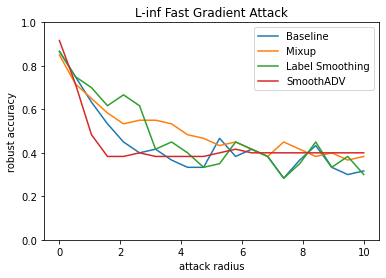

In [81]:
plt.title("L-inf Fast Gradient Attack")
plt.xlabel("attack radius")
plt.ylabel("robust accuracy")
plt.ylim(0, 1.0)
plt.plot(eps_linf, rob_baseline_linf)
plt.plot(eps_linf, rob_mixup_linf)
plt.plot(eps_linf, rob_label_sm)
plt.plot(eps_linf, rob_adv_linf)


plt.legend(["Baseline", "Mixup", "Label Smoothing" , "SmoothADV"])
plt.savefig('filename.png', dpi=450)
plt.show()


In [16]:
project="BMW"
max_rad = 250
title = 'bmw_noise'
config_path = 'logs/crnn-bmw_fold2_noise/version_0/hparams.yaml'
pretrained_path = 'weights/crnn_bmw/crnn-bmw_fold2_noise-epoch=112-val_acc=0.924.ckpt'
eps_noise, rob_noise = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw_fold2_noise', 'SAVE_PATH': '../weights/crnn_bmw', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'noise', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'ALPHA': 1.7522326562381854, 'GAMMA': 0.5, 'LEARNING_RATE': 0.00021701925536763377, 'LOG_PATH': '../logs/', 'MAX_EPOCH': 150, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.25, 'STEP_SIZE': 10, 'WEIGHT_DECAY': 2.9720995669595073e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram in dataloader.
Data a

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 206.74 seconds
[0.7166666666666667, 0.7666666666666666, 0.75, 0.75, 0.7666666666666666, 0.6666666666666667, 0.7, 0.7, 0.7166666666666667, 0.7166666666666667, 0.7333333333333334, 0.6666666666666667, 0.7833333333333333, 0.6833333333333333, 0.7166666666666667, 0.6666666666666667, 0.6833333333333333, 0.6833333333333333, 0.7333333333333334, 0.7333333333333334, 0.6666666666666667, 0.7, 0.6666666666666667, 0.65, 0.6666666666666667, 0.7166666666666667, 0.65, 0.7, 0.65, 0.65, 0.7, 0.6166666666666667, 0.6833333333333333, 0.6833333333333333, 0.65, 0.6166666666666667, 0.6666666666666667, 0.6, 0.65, 0.6, 0.6333333333333333, 0.65, 0.6166666666666667, 0.65, 0.6666666666666667, 0.6166666666666667, 0.6666666666666667, 0.6833333333333333, 0.6666666666666667, 0.6666666666666667]


In [69]:
rob_noise = [0.7166666666666667, 0.7666666666666666, 0.75, 0.75, 0.7666666666666666, 0.6666666666666667, 0.7, 0.7, 0.7166666666666667, 0.7166666666666667, 0.7333333333333334, 0.6666666666666667, 0.7833333333333333, 0.6833333333333333, 0.7166666666666667, 0.6666666666666667, 0.6833333333333333, 0.6833333333333333, 0.7333333333333334, 0.7333333333333334, 0.6666666666666667, 0.7, 0.6666666666666667, 0.65, 0.6666666666666667, 0.7166666666666667, 0.65, 0.7, 0.65, 0.65, 0.7, 0.6166666666666667, 0.6833333333333333, 0.6833333333333333, 0.65, 0.6166666666666667, 0.6666666666666667, 0.6, 0.65, 0.6, 0.6333333333333333, 0.65, 0.6166666666666667, 0.65, 0.6666666666666667, 0.6166666666666667, 0.6666666666666667, 0.6833333333333333, 0.6666666666666667, 0.6666666666666667]

In [19]:
project="BMW"
max_rad = 250
title = 'bmw_random'
config_path = 'logs/crnn-bmw_fold2_random/version_1/hparams.yaml'
pretrained_path = 'weights/crnn_bmw/crnn-bmw_fold2_random-epoch=58-val_acc=0.915.ckpt'
eps_random, rob_random = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw_fold2_random', 'SAVE_PATH': '../weights/crnn_bmw', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 6, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'random', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'ALPHA': 1.7522326562381854, 'GAMMA': 0.5, 'LEARNING_RATE': 0.00021701925536763377, 'LOG_PATH': '../logs/', 'MAX_EPOCH': 150, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.25, 'STEP_SIZE': 10, 'WEIGHT_DECAY': 2.9720995669595073e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram in dataloader.
Data

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 206.82 seconds
[0.7, 0.7333333333333334, 0.7166666666666667, 0.6833333333333333, 0.7, 0.65, 0.7, 0.7, 0.6666666666666667, 0.7333333333333334, 0.7166666666666667, 0.6833333333333333, 0.7166666666666667, 0.65, 0.75, 0.6833333333333333, 0.7166666666666667, 0.7166666666666667, 0.6666666666666667, 0.6833333333333333, 0.6166666666666667, 0.6833333333333333, 0.65, 0.65, 0.6333333333333333, 0.6333333333333333, 0.6833333333333333, 0.5833333333333333, 0.65, 0.6833333333333333, 0.6666666666666667, 0.6666666666666667, 0.6, 0.65, 0.6, 0.6333333333333333, 0.5833333333333333, 0.55, 0.6333333333333333, 0.6666666666666667, 0.6166666666666667, 0.6333333333333333, 0.6, 0.65, 0.5666666666666667, 0.5333333333333333, 0.6166666666666667, 0.5833333333333333, 0.5666666666666667, 0.6166666666666667]


In [38]:
rob_random = [0.7, 0.7333333333333334, 0.7166666666666667, 0.6833333333333333, 0.7, 0.65, 0.7, 0.7, 0.6666666666666667, 0.7333333333333334, 0.7166666666666667, 0.6833333333333333, 0.7166666666666667, 0.65, 0.75, 0.6833333333333333, 0.7166666666666667, 0.7166666666666667, 0.6666666666666667, 0.6833333333333333, 0.6166666666666667, 0.6833333333333333, 0.65, 0.65, 0.6333333333333333, 0.6333333333333333, 0.6833333333333333, 0.5833333333333333, 0.65, 0.6833333333333333, 0.6666666666666667, 0.6666666666666667, 0.6, 0.65, 0.6, 0.6333333333333333, 0.5833333333333333, 0.55, 0.6333333333333333, 0.6666666666666667, 0.6166666666666667, 0.6333333333333333, 0.6, 0.65, 0.5666666666666667, 0.5333333333333333, 0.6166666666666667, 0.5833333333333333, 0.5666666666666667, 0.6166666666666667]

In [20]:
project="BMW"
max_rad = 250
title = 'bmw_baseline'
config_path = 'logs/crnn-bmw/version_26/hparams.yaml'
pretrained_path = 'weights/bmw_final_fold2_baseline/crnn-bmw-epoch=128-val_acc=0.951.ckpt'
eps_baseline, rob_baseline = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw', 'SAVE_PATH': '../weights/bmw_final_fold2_baseline', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'none', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'ALPHA': 1.7522326562381854, 'GAMMA': 0.5, 'LEARNING_RATE': 0.00021701925536763377, 'LOG_PATH': '../logs/', 'MAX_EPOCH': 150, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.25, 'STEP_SIZE': 10, 'WEIGHT_DECAY': 2.9720995669595073e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram in dataloader.
Dat

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 207.72 seconds
[0.85, 0.8666666666666667, 0.8166666666666667, 0.7666666666666666, 0.8666666666666667, 0.7833333333333333, 0.7833333333333333, 0.8166666666666667, 0.7833333333333333, 0.8, 0.7666666666666666, 0.7833333333333333, 0.8333333333333334, 0.7666666666666666, 0.8, 0.7166666666666667, 0.7333333333333334, 0.7833333333333333, 0.7333333333333334, 0.7166666666666667, 0.7, 0.75, 0.7166666666666667, 0.7333333333333334, 0.75, 0.7333333333333334, 0.7333333333333334, 0.7, 0.7333333333333334, 0.65, 0.6833333333333333, 0.7, 0.7333333333333334, 0.7166666666666667, 0.7, 0.7, 0.6166666666666667, 0.6666666666666667, 0.65, 0.7166666666666667, 0.65, 0.65, 0.6666666666666667, 0.65, 0.65, 0.6666666666666667, 0.6333333333333333, 0.6333333333333333, 0.6166666666666667, 0.6166666666666667]


In [39]:
rob_mixup = [0.85, 0.8666666666666667, 0.8166666666666667, 0.7666666666666666, 0.8666666666666667, 0.7833333333333333, 0.7833333333333333, 0.8166666666666667, 0.7833333333333333, 0.8, 0.7666666666666666, 0.7833333333333333, 0.8333333333333334, 0.7666666666666666, 0.8, 0.7166666666666667, 0.7333333333333334, 0.7833333333333333, 0.7333333333333334, 0.7166666666666667, 0.7, 0.75, 0.7166666666666667, 0.7333333333333334, 0.75, 0.7333333333333334, 0.7333333333333334, 0.7, 0.7333333333333334, 0.65, 0.6833333333333333, 0.7, 0.7333333333333334, 0.7166666666666667, 0.7, 0.7, 0.6166666666666667, 0.6666666666666667, 0.65, 0.7166666666666667, 0.65, 0.65, 0.6666666666666667, 0.65, 0.65, 0.6666666666666667, 0.6333333333333333, 0.6333333333333333, 0.6166666666666667, 0.6166666666666667]

In [36]:
project="BMW"
max_rad = 250
title = 'bmw_uniform'
config_path = 'logs/crnn-bmw_fold2_uniform/crnn-bmw_fold4_uniform/version_0/hparams.yaml'
pretrained_path = 'weights/crnn_bmw/crnn-bmw_fold2_uniform-epoch=31-val_acc=0.957.ckpt'
_, rob_uniform = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw_fold4_uniform', 'SAVE_PATH': '../weights/crnn_bmw', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 3, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'uniform', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'ALPHA': 1.7522326562381854, 'GAMMA': 0.5, 'LEARNING_RATE': 0.00021701925536763377, 'LOG_PATH': '../logs/fold4_uniform', 'MAX_EPOCH': 150, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.25, 'STEP_SIZE': 10, 'WEIGHT_DECAY': 2.9720995669595073e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram in d

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 207.86 seconds
[0.7666666666666666, 0.8, 0.7333333333333334, 0.7, 0.6833333333333333, 0.6833333333333333, 0.6833333333333333, 0.6666666666666667, 0.65, 0.7, 0.6666666666666667, 0.6666666666666667, 0.6833333333333333, 0.65, 0.65, 0.6333333333333333, 0.6666666666666667, 0.6166666666666667, 0.6, 0.6166666666666667, 0.65, 0.6, 0.6333333333333333, 0.6166666666666667, 0.6333333333333333, 0.6, 0.6333333333333333, 0.55, 0.5666666666666667, 0.6, 0.55, 0.6166666666666667, 0.5833333333333333, 0.5833333333333333, 0.5166666666666666, 0.55, 0.5166666666666666, 0.5666666666666667, 0.6, 0.55, 0.5333333333333333, 0.55, 0.5666666666666667, 0.5333333333333333, 0.4666666666666667, 0.5333333333333333, 0.5166666666666666, 0.55, 0.5166666666666666, 0.5]


In [23]:
rob_uniform = [0.7666666666666666, 0.8, 0.7333333333333334, 0.7, 0.6833333333333333, 0.6833333333333333, 0.6833333333333333, 0.6666666666666667, 0.65, 0.7, 0.6666666666666667, 0.6666666666666667, 0.6833333333333333, 0.65, 0.65, 0.6333333333333333, 0.6666666666666667, 0.6166666666666667, 0.6, 0.6166666666666667, 0.65, 0.6, 0.6333333333333333, 0.6166666666666667, 0.6333333333333333, 0.6, 0.6333333333333333, 0.55, 0.5666666666666667, 0.6, 0.55, 0.6166666666666667, 0.5833333333333333, 0.5833333333333333, 0.5166666666666666, 0.55, 0.5166666666666666, 0.5666666666666667, 0.6, 0.55, 0.5333333333333333, 0.55, 0.5666666666666667, 0.5333333333333333, 0.4666666666666667, 0.5333333333333333, 0.5166666666666666, 0.55, 0.5166666666666666, 0.5]

In [37]:
project="BMW"
max_rad = 250
title = 'bmw_gaussian'
config_path = 'logs/fold2_gaussian/crnn-bmw_fold2_gaussian/version_0/hparams.yaml'
pretrained_path = 'weights/crnn_bmw/crnn-bmw_fold2_gaussian-epoch=38-val_acc=0.925.ckpt'
_, rob_gaussian = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw_fold2_gaussian', 'SAVE_PATH': '../weights/crnn_bmw', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 4, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'gaussian', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'ALPHA': 1.7522326562381854, 'GAMMA': 0.5, 'LEARNING_RATE': 0.00021701925536763377, 'LOG_PATH': '../logs/fold2_gaussian', 'MAX_EPOCH': 150, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.25, 'STEP_SIZE': 10, 'WEIGHT_DECAY': 2.9720995669595073e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram i

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 208.62 seconds
[0.7666666666666666, 0.7166666666666667, 0.65, 0.6666666666666667, 0.6333333333333333, 0.6333333333333333, 0.7, 0.6833333333333333, 0.65, 0.6666666666666667, 0.6166666666666667, 0.6333333333333333, 0.6166666666666667, 0.5333333333333333, 0.55, 0.5333333333333333, 0.5666666666666667, 0.5833333333333333, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.55, 0.5333333333333333, 0.5166666666666666, 0.4833333333333333, 0.5166666666666666, 0.4833333333333333, 0.5166666666666666, 0.5166666666666666, 0.5, 0.4833333333333333, 0.55, 0.4666666666666667, 0.5, 0.5166666666666666, 0.5166666666666666, 0.4833333333333333, 0.5166666666666666, 0.4833333333333333, 0.4833333333333333, 0.4833333333333333, 0.43333333333333335, 0.4833333333333333, 0.4833333333333333, 0.4666666666666667, 0.4666666666666667, 0.44999999999999996, 0.44999999999999996, 0.4]


In [70]:
rob_baseline = [0.85, 0.85, 0.8666666666666667, 0.8333333333333334, 0.8166666666666667, 0.8333333333333334, 0.8666666666666667, 0.8, 0.8, 0.7833333333333333, 0.7666666666666666, 0.7833333333333333, 0.75, 0.75, 0.8, 0.8, 0.75, 0.7, 0.7166666666666667, 0.75, 0.7166666666666667, 0.7666666666666666, 0.7166666666666667, 0.7, 0.6833333333333333, 0.7, 0.7, 0.75, 0.6833333333333333, 0.7166666666666667, 0.7, 0.6166666666666667, 0.75, 0.7, 0.6833333333333333, 0.6333333333333333, 0.7, 0.7, 0.6333333333333333, 0.6166666666666667, 0.6666666666666667, 0.7166666666666667, 0.6166666666666667, 0.6833333333333333, 0.65, 0.65, 0.6833333333333333, 0.55, 0.6666666666666667, 0.6166666666666667]

In [71]:
rob_label_sm = [0.8666666666666667, 0.8166666666666667, 0.85, 0.8333333333333334, 0.8166666666666667, 0.7833333333333333, 0.75, 0.75, 0.75, 0.75, 0.7666666666666666, 0.75, 0.75, 0.7333333333333334, 0.75, 0.7333333333333334, 0.7, 0.7333333333333334, 0.7333333333333334, 0.7333333333333334, 0.75, 0.7333333333333334, 0.6833333333333333, 0.7333333333333334, 0.6833333333333333, 0.7166666666666667, 0.6833333333333333, 0.7166666666666667, 0.7166666666666667, 0.6833333333333333, 0.75, 0.7, 0.7166666666666667, 0.7, 0.6833333333333333, 0.6833333333333333, 0.65, 0.7, 0.65, 0.65, 0.65, 0.65, 0.6333333333333333, 0.7, 0.6666666666666667, 0.65, 0.6333333333333333, 0.6833333333333333, 0.6333333333333333, 0.6666666666666667]


In [72]:
rob_smoothadv = [0.95, 0.95, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9166666666666666, 0.9, 0.8666666666666667, 0.85, 0.85, 0.85, 0.85, 0.85, 0.8333333333333334, 0.8166666666666667, 0.8166666666666667, 0.8, 0.8, 0.7833333333333333, 0.7666666666666666, 0.75, 0.7333333333333334, 0.7166666666666667, 0.7, 0.7, 0.6833333333333333, 0.6833333333333333, 0.6666666666666667, 0.65, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.65, 0.65, 0.65, 0.65, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.6666666666666667, 0.65, 0.6166666666666667, 0.6166666666666667, 0.6166666666666667, 0.6, 0.6]


In [24]:
rob_gaussian = [0.7666666666666666, 0.7166666666666667, 0.65, 0.6666666666666667, 0.6333333333333333, 0.6333333333333333, 0.7, 0.6833333333333333, 0.65, 0.6666666666666667, 0.6166666666666667, 0.6333333333333333, 0.6166666666666667, 0.5333333333333333, 0.55, 0.5333333333333333, 0.5666666666666667, 0.5833333333333333, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.55, 0.5333333333333333, 0.5166666666666666, 0.4833333333333333, 0.5166666666666666, 0.4833333333333333, 0.5166666666666666, 0.5166666666666666, 0.5, 0.4833333333333333, 0.55, 0.4666666666666667, 0.5, 0.5166666666666666, 0.5166666666666666, 0.4833333333333333, 0.5166666666666666, 0.4833333333333333, 0.4833333333333333, 0.4833333333333333, 0.43333333333333335, 0.4833333333333333, 0.4833333333333333, 0.4666666666666667, 0.4666666666666667, 0.44999999999999996, 0.44999999999999996, 0.4]

In [53]:
eps_noise  = eps_noise[:10]

In [56]:
eps_noise = np.linspace(0.0, 250, 50)

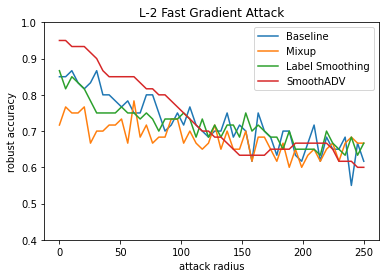

In [74]:
plt.title("L-2 Fast Gradient Attack")
plt.xlabel("attack radius")
plt.ylabel("robust accuracy")
plt.ylim(0.4, 1.0)

plt.plot(eps_noise, rob_baseline)

plt.plot(eps_noise, rob_noise)
plt.plot(eps_noise, rob_label_sm)
plt.plot(eps_noise, rob_smoothadv)


names = ["Baseline", "Mixup", "Label Smoothing", "SmoothADV"]
plt.legend(names, loc='upper right')
plt.savefig('filename.png', dpi=450)
plt.show()


In [4]:
device

device(type='cuda')

In [3]:
project="UrbanSound8k"
max_rad = 0.1
title = 'us8k_mixup'
config_path = 'logs/crnn_us8k_fold9/crnn-us8k_fold9_mixup/version_3/hparams.yaml'
pretrained_path = 'weights/us8k/crnn-us8k_fold9_mixup-epoch=81-val_acc=0.725.ckpt'
eps_1, rob_1 = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

cuda
{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-us8k_fold9_mixup', 'SAVE_PATH': '../weights/us8k', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 6, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/metadata/UrbanSound8K.csv', 'AUGMENTATION': 'none', 'FILE_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/audio/', 'NAME': 'UrbanSounds8K', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 9, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 10}, 'SOLVER': {'ALPHA': 0.7608399210841633, 'GAMMA': 0.1, 'LEARNING_RATE': 0.0004881731392294949, 'LOG_PATH': '../logs/crnn_us8k_fold9', 'MAX_EPOCH': 100, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.5, 'STEP_SIZE': 7, 'WEIGHT_DECAY': 2.628328526113425e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed 

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 451.01 seconds
[0.50125, 0.5025, 0.5137499999999999, 0.50125, 0.49624999999999997, 0.5075000000000001, 0.505, 0.505, 0.5037499999999999, 0.50625, 0.5025, 0.48375, 0.49250000000000005, 0.4525, 0.47624999999999995, 0.45375, 0.47, 0.47, 0.45375, 0.45375]


In [52]:
project="UrbanSound8k"
max_rad = 0.1
title = 'us8k_mixup'
config_path = 'logs/crnn_us8k_fold9/crnn-us8k_fold9_mixup/version_3/hparams.yaml'
pretrained_path = 'weights/us8k/crnn-us8k_fold9_mixup-epoch=81-val_acc=0.725.ckpt'
eps_1, rob_1 = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-us8k_fold9_mixup', 'SAVE_PATH': '../weights/us8k', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 6, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/metadata/UrbanSound8K.csv', 'AUGMENTATION': 'none', 'FILE_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/audio/', 'NAME': 'UrbanSounds8K', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 9, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 10}, 'SOLVER': {'ALPHA': 0.7608399210841633, 'GAMMA': 0.1, 'LEARNING_RATE': 0.0004881731392294949, 'LOG_PATH': '../logs/crnn_us8k_fold9', 'MAX_EPOCH': 100, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.5, 'STEP_SIZE': 7, 'WEIGHT_DECAY': 2.628328526113425e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw a

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 194.51 seconds
[0.5583333333333333, 0.5416666666666667, 0.5083333333333333, 0.5041666666666667, 0.47916666666666663, 0.55, 0.49583333333333335, 0.5208333333333333, 0.5208333333333333, 0.4375, 0.4916666666666667, 0.4666666666666667, 0.45833333333333337, 0.4375, 0.4458333333333333, 0.41666666666666663, 0.4375, 0.4208333333333333, 0.4541666666666667, 0.4458333333333333]


In [4]:
rob_baseline= [0.35250000000000004, 0.22875, 0.1825, 0.16374999999999995, 0.16125, 0.15874999999999995, 0.15249999999999997, 0.15375000000000005, 0.14500000000000002, 0.15249999999999997, 0.14625, 0.15375000000000005, 0.15749999999999997, 0.16625, 0.14625, 0.14625, 0.15500000000000003, 0.15874999999999995, 0.16249999999999998, 0.14749999999999996]

In [6]:
import numpy as np
eps = np.linspace(0.0, 1.0, 20)

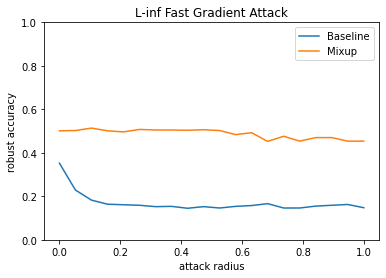

In [8]:
plt.title("L-inf Fast Gradient Attack")
plt.xlabel("attack radius")
plt.ylabel("robust accuracy")
plt.ylim(0, 1.0)
plt.plot(eps, rob_baseline)
plt.plot(eps, rob_1)


names = ["Baseline", "Mixup"]
plt.legend(names, loc='upper right')
plt.savefig('filename.png', dpi=450)

plt.show()


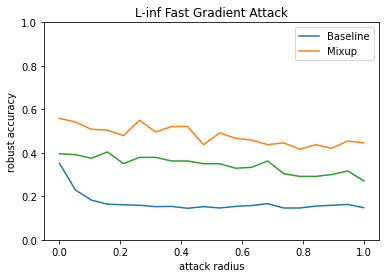

In [84]:
plt.title("L-inf Fast Gradient Attack")
plt.xlabel("attack radius")
plt.ylabel("robust accuracy")
plt.ylim(0, 1.0)
plt.plot(eps, rob_baseline)
plt.plot(eps, rob_1)
plt.plot(eps, rob_2)


names = ["Baseline", "Mixup"]
plt.legend(names, loc='upper right')
plt.savefig('filename.png', dpi=450)

plt.show()


In [13]:
project="UrbanSound8k"
max_rad = 250
title = 'us8k_random'
config_path = 'logs/crnn_us8k_fold9_random/crnn-us8k_fold9_random/version_2/hparams.yaml'
pretrained_path = 'weights/us8k/crnn-us8k_fold9_random-epoch=51-val_acc=0.695.ckpt'
_, rob_3 = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

cuda
{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-us8k_fold9_random', 'SAVE_PATH': '../weights/us8k', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 8, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/metadata/UrbanSound8K.csv', 'AUGMENTATION': 'random', 'FILE_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/audio/', 'NAME': 'UrbanSounds8K', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 9, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 10}, 'SOLVER': {'ALPHA': 0.7608399210841633, 'GAMMA': 0.1, 'LEARNING_RATE': 0.0004881731392294949, 'LOG_PATH': '../logs/crnn_us8k_fold9_random', 'MAX_EPOCH': 82, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.5, 'STEP_SIZE': 7, 'WEIGHT_DECAY': 2.628328526113425e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Tra

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 1122.26 seconds
[0.42874999999999996, 0.40249999999999997, 0.39, 0.37749999999999995, 0.36124999999999996, 0.32875, 0.3225, 0.3225, 0.2925, 0.28874999999999995, 0.2875, 0.27249999999999996, 0.26875000000000004, 0.25, 0.255, 0.24124999999999996, 0.20625000000000004, 0.21999999999999997, 0.22499999999999998, 0.22499999999999998, 0.22750000000000004, 0.21375, 0.19874999999999998, 0.20375, 0.20875, 0.1825, 0.19625000000000004, 0.1925, 0.18125000000000002, 0.19374999999999998, 0.1825, 0.19874999999999998, 0.16625, 0.1725, 0.16125, 0.17500000000000004, 0.15625, 0.16874999999999996, 0.18625000000000003, 0.17125, 0.16874999999999996, 0.17500000000000004, 0.16249999999999998, 0.16374999999999995, 0.16625, 0.17125, 0.17625000000000002, 0.16125, 0.16374999999999995, 0.15375000000000005]


In [75]:
project="UrbanSound8k"
max_rad = 250
title = 'us8k_mixup'
config_path = 'logs/crnn_us8k_fold9/crnn-us8k_fold9_mixup/version_3/hparams.yaml'
pretrained_path = 'weights/us8k/crnn-us8k_fold9_mixup-epoch=81-val_acc=0.725.ckpt'
_, rob_2 = attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-us8k_fold9_mixup', 'SAVE_PATH': '../weights/us8k', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 6, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/metadata/UrbanSound8K.csv', 'AUGMENTATION': 'none', 'FILE_PATH': '/nfs/students/winter-term-2020/project-1/datasets/UrbanSound8K/audio/', 'NAME': 'UrbanSounds8K', 'NOISE_PATH': '/nfs/students/winter-term-2020/project-1/MUSAN/free-sound/', 'VAL_FOLD': 9, 'WEIGHT': 'NORMAL'}, 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'MIXUP': True, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 10}, 'SOLVER': {'ALPHA': 0.7608399210841633, 'GAMMA': 0.1, 'LEARNING_RATE': 0.0004881731392294949, 'LOG_PATH': '../logs/crnn_us8k_fold9', 'MAX_EPOCH': 100, 'MIN_EPOCH': 10, 'NUM_GPUS': 1, 'SIGMA': 0.5, 'STEP_SIZE': 7, 'WEIGHT_DECAY': 2.628328526113425e-08}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw a

/nfs/homedirs/nikoghos/anaconda3/lib/python3.8/site-packages/foolbox/models/pytorch.py:36: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  warnings.warn(


Generated attacks in 485.84 seconds
[0.5375, 0.5291666666666667, 0.44166666666666665, 0.44166666666666665, 0.38749999999999996, 0.3666666666666667, 0.3583333333333333, 0.30833333333333335, 0.3458333333333333, 0.3375, 0.2833333333333333, 0.30000000000000004, 0.26249999999999996, 0.23333333333333328, 0.21666666666666667, 0.21250000000000002, 0.22916666666666663, 0.19999999999999996, 0.1875, 0.19999999999999996, 0.20833333333333337, 0.18333333333333335, 0.15833333333333333, 0.17083333333333328, 0.17500000000000004, 0.17083333333333328, 0.14583333333333337, 0.14583333333333337, 0.1333333333333333, 0.1333333333333333, 0.17500000000000004, 0.12083333333333335, 0.14166666666666672, 0.14166666666666672, 0.13749999999999996, 0.14583333333333337, 0.15000000000000002, 0.09583333333333333, 0.1333333333333333, 0.10416666666666663, 0.1166666666666667, 0.1166666666666667, 0.1333333333333333, 0.125, 0.10416666666666663, 0.1166666666666667, 0.10833333333333328, 0.12083333333333335, 0.10833333333333328,

In [82]:
rob2_baseline = [0.365, 0.35624999999999996, 0.33999999999999997, 0.33125000000000004, 0.30125, 0.30125, 0.29374999999999996, 0.265, 0.27125, 0.26625, 0.26249999999999996, 0.235, 0.24124999999999996, 0.22875, 0.22124999999999995, 0.20625000000000004, 0.21125000000000005, 0.19999999999999996, 0.21125000000000005, 0.21750000000000003, 0.18500000000000005, 0.20499999999999996, 0.20625000000000004, 0.21250000000000002, 0.18125000000000002, 0.19374999999999998, 0.1925, 0.1825, 0.18999999999999995, 0.17625000000000002, 0.18500000000000005, 0.16249999999999998, 0.1875, 0.17125, 0.16874999999999996, 0.17000000000000004, 0.17625000000000002, 0.16625, 0.17000000000000004, 0.16749999999999998, 0.16374999999999995, 0.16500000000000004, 0.1725, 0.15749999999999997, 0.16249999999999998, 0.17374999999999996, 0.16500000000000004, 0.16374999999999995, 0.15375000000000005, 0.16249999999999998]


In [86]:
rob_2 = [0.42874999999999996, 0.40249999999999997, 0.39, 0.37749999999999995, 0.36124999999999996, 0.32875, 0.3225, 0.3225, 0.2925, 0.28874999999999995, 0.2875, 0.27249999999999996, 0.26875000000000004, 0.25, 0.255, 0.24124999999999996, 0.20625000000000004, 0.21999999999999997, 0.22499999999999998, 0.22499999999999998, 0.22750000000000004, 0.21375, 0.19874999999999998, 0.20375, 0.20875, 0.1825, 0.19625000000000004, 0.1925, 0.18125000000000002, 0.19374999999999998, 0.1825, 0.19874999999999998, 0.16625, 0.1725, 0.16125, 0.17500000000000004, 0.15625, 0.16874999999999996, 0.18625000000000003, 0.17125, 0.16874999999999996, 0.17500000000000004, 0.16249999999999998, 0.16374999999999995, 0.16625, 0.17125, 0.17625000000000002, 0.16125, 0.16374999999999995, 0.15375000000000005]

In [87]:
eps = np.linspace(0.0, 250, 50)

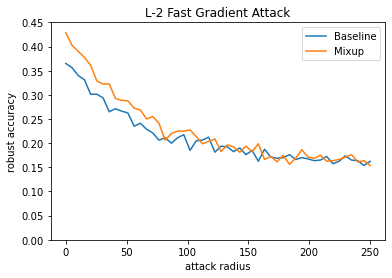

In [89]:
plt.title("L-2 Fast Gradient Attack")
plt.xlabel("attack radius")
plt.ylabel("robust accuracy")
plt.ylim(0, 0.45)
plt.plot(eps, rob2_baseline)

plt.plot(eps, rob_2)


names = [ "Baseline", "Mixup"]
plt.legend(names, loc='upper right')
plt.savefig('filename.png', dpi=450)

plt.show()
